<a href="https://colab.research.google.com/github/tdiego74/Clase_Data_Science_III_PBLC/blob/main/Proyecto_DS_III_Entrega_Final_Tocci.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Analisis de Reseñas de películas en español de FilmAffinity**

##**Abstracto con Motivación y Audiencia**

En este proyecto se analiza un conjunto de datos de reseñas obtenidas de FilmAffinity para explorar patrones en el texto, realizar análisis de sentimientos y aplicar técnicas de procesamiento de lenguaje natural (NLP) para identificar insights significativos.

El objetivo principal es el desarrollo de modelos predictivos que puedan clasificar las reseñas según su polaridad.


##**Contexto Comercial y Analítico**

FilmAffinity es una plataforma de recomendaciones y críticas de películas que permite a los usuarios valorar y escribir reseñas sobre títulos cinematográficos. Las reseñas de los usuarios son una fuente valiosa de información para comprender las preferencias asociadas con el consumo de peliculas.


##**Objetivo**

El objetivo de este proyecto es analizar y procesar el texto de las reseñas de FilmAffinity mediante técnicas de NLP como:
- Preprocesamiento y limpieza del texto.
- Análisis exploratorio para identificar patrones significativos.
- Entrenamiento de un modelo para predecir la polaridad o calificación de las reseñas.

## **Instalaciones y Librerías**

In [49]:
!pip install spacy
!python -m spacy download es_core_news_sm
!pip install wordcloud
!pip install matplotlib

import pandas as pd  # Manejo de datos
import numpy as np  # Cálculos adicionales
import matplotlib.pyplot as plt  # Gráficos
import re  # Expresiones regulares
import string  # Manipulación de cadenas
import nltk  # Procesamiento de lenguaje natural
import spacy  # Procesamiento de lenguaje natural
nlp = spacy.load('es_core_news_sm') # Cargar el modelo en español para spaCy
from collections import Counter  # Contar elementos
from wordcloud import WordCloud  # Nube de palabras
from sklearn.feature_extraction.text import CountVectorizer  # N-gramas
from nltk.tokenize import word_tokenize  # Tokenización
from nltk.util import ngrams # N-Gramas

# Descargar recursos de NLTK
nltk.download('punkt')
nltk.download('punkt_tab')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 46.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
# Se lee el archivo desde GitHub

df = pd.read_csv(
    'https://github.com/tdiego74/Clase_Data_Science_III_PBLC/raw/main/reviews_filmaffinity.csv',
    sep=r'\|\|',
    engine='python',
    quoting=3
)

# Mostrar las primeras filas
print("Primeras filas del dataset:")
print(df.head())

# Mostrar información del DataFrame
print("\nInformación general del dataset:")
print(df.info())



Primeras filas del dataset:
               film_name   gender film_avg_rate  review_rate  \
0  Ocho apellidos vascos  Comedia           6,0          3.0   
1  Ocho apellidos vascos  Comedia           6,0          2.0   
2  Ocho apellidos vascos  Comedia           6,0          2.0   
3  Ocho apellidos vascos  Comedia           6,0          2.0   
4  Ocho apellidos vascos  Comedia           6,0          2.0   

                                        review_title  \
0     OCHO APELLIDOS VASCOS...Y NINGÚN NOMBRE PROPIO   
1                                     El perro verde   
2  Si no eres de comer mierda... no te comas esta...   
3                                    Aida: The movie   
4               UN HOMBRE SOLO (Julio Iglesias 1987)   

                                         review_text  
0  La mayor virtud de esta película es su existen...  
1  No soy un experto cinéfilo, pero pocas veces m...  
2  Si no eres un incondicional del humor estilo T...  
3  No sé qué está pasando, si 

In [50]:
# Eliminacion de registros con valores de reseñas nulos
df = df.dropna(subset=['review_rate'])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 8601 entries, 0 to 8602
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   film_name              8601 non-null   object 
 1   gender                 8601 non-null   object 
 2   film_avg_rate          8601 non-null   object 
 3   review_rate            8601 non-null   float64
 4   review_title           8601 non-null   object 
 5   review_text            8601 non-null   object 
 6   Etiqueta_Numerica      8601 non-null   int64  
 7   Etiqueta_alfanumerica  8601 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 604.8+ KB
None


In [51]:
# Distribución de géneros
print("Distribución de géneros:")
print(df['gender'].value_counts())

# Distribución de calificaciones individuales (review_rate)
print("\nDistribución de calificaciones (review_rate):")
print(df['review_rate'].value_counts())

Distribución de géneros:
gender
Comedia       2494
Drama         1671
Terror         941
Aventuras      939
Thriller       762
Fantástico     495
Cine negro     419
Animación      284
Romance        283
Intriga        248
Musical         65
Name: count, dtype: int64

Distribución de calificaciones (review_rate):
review_rate
8.0     1292
7.0     1282
6.0     1256
5.0      978
9.0      833
3.0      695
1.0      639
4.0      590
2.0      523
10.0     513
Name: count, dtype: int64


In [52]:
# Cargar las reseñas desde el archivo
corpus = df['review_text'].tolist()  # Convierte la columna de reseñas a una lista de texto

# Preprocesar las reseñas
def preprocess(sentence):
    tokens = word_tokenize(sentence)  # Tokenizar la oración
    tokens = [word.lower() for word in tokens if word not in string.punctuation]  # Eliminar puntuación
    return tokens

# Aplica la limpieza inicial al corpus
cleaned_corpus = [preprocess(sentence) for sentence in corpus]

# Muestra el resultado de la limpieza para las primeras 5 reseñas
print("Reseña original:", corpus[:5])
print("\nReseña preprocesada (tokenizada y limpiada):", cleaned_corpus[:5])

Reseña original: ['La mayor virtud de esta película es su existencia.El hecho de que podamos jugar con los tópicos más extremos de las identidades patrias (la andaluza y la vasca) sin que nadie se escandalice ni ponga el grito en el cielo, indica mucho de nuestra madurez como nación (pese a quien pese). Bueno, corrijo: el hecho de que podamos jugar y hacer mofa y befa de los tópicos sobre los vascos y el nacionalismo vasco, sin que nadie se escandalice ni ponga el grito en el cielo, indica mucho del grado de normalización de ciertas cuestiones que antes eran llagas abiertas siempre dispuestas a sangrar. Y hago esta corrección, porque los andaluces han sido motivo de guasa siempre y nunca ha pasado nada.Por esto mismo, el planteamiento de "Ocho Apellidos Vascos" es valiente, es oportuno y es oportunista. Seguramente sea esa una de las principales razones por la que los españoles hemos acudido en masa, en una masa casi sin precedentes, a los cines a ver este producto patrocinado por Tele

In [53]:
# Número de oraciones en el corpus
num_sentences = len(cleaned_corpus)
print(f"Número de oraciones en el corpus: {num_sentences}")

# Número total de palabras en el corpus
num_words = sum(len(sentence) for sentence in cleaned_corpus)
print(f"Número total de palabras en el corpus: {num_words}")

Número de oraciones en el corpus: 8601
Número total de palabras en el corpus: 1869421


In [54]:
# Mostrar la primera oración del corpus
print(corpus[0])

La mayor virtud de esta película es su existencia.El hecho de que podamos jugar con los tópicos más extremos de las identidades patrias (la andaluza y la vasca) sin que nadie se escandalice ni ponga el grito en el cielo, indica mucho de nuestra madurez como nación (pese a quien pese). Bueno, corrijo: el hecho de que podamos jugar y hacer mofa y befa de los tópicos sobre los vascos y el nacionalismo vasco, sin que nadie se escandalice ni ponga el grito en el cielo, indica mucho del grado de normalización de ciertas cuestiones que antes eran llagas abiertas siempre dispuestas a sangrar. Y hago esta corrección, porque los andaluces han sido motivo de guasa siempre y nunca ha pasado nada.Por esto mismo, el planteamiento de "Ocho Apellidos Vascos" es valiente, es oportuno y es oportunista. Seguramente sea esa una de las principales razones por la que los españoles hemos acudido en masa, en una masa casi sin precedentes, a los cines a ver este producto patrocinado por Tele 5. Esa junto con l

## **Analisis de la longitud de las oraciones**

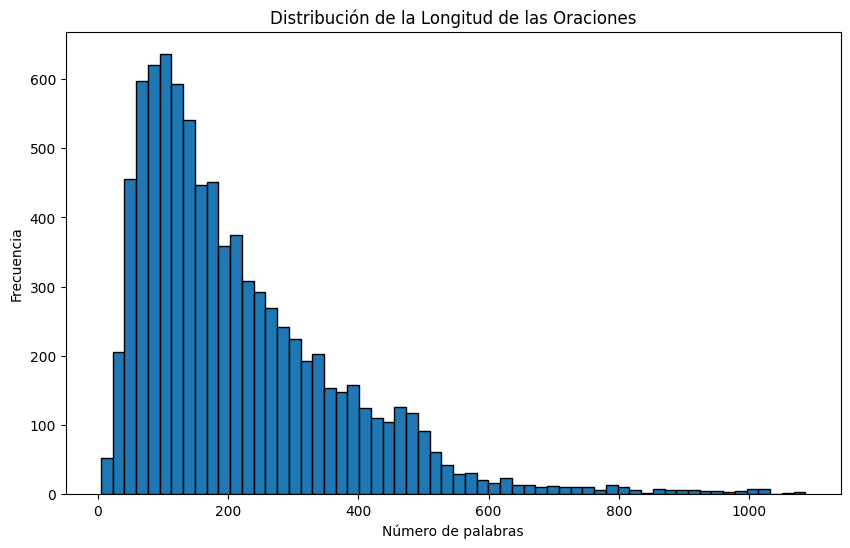

In [55]:
# Longitud de las oraciones
sentence_lengths = [len(sentence) for sentence in cleaned_corpus]

plt.figure(figsize=(10, 6))
plt.hist(sentence_lengths, bins=60, edgecolor='black')
plt.title('Distribución de la Longitud de las Oraciones')
plt.xlabel('Número de palabras')
plt.ylabel('Frecuencia')
plt.show()

El corpus tiene una buena variabilidad en la longitud de las reseñas.
Las reseñas más largas podrían contener mayor riqueza semántica, mientras que las más cortas podrían ser directas y concisas.

##**Analisis de la frecuencia de las Palabras**

Las 20 palabras más comunes: [('de', 96790), ('que', 79115), ('la', 64939), ('y', 55789), ('en', 42053), ('el', 40595), ('a', 36082), ('no', 27730), ('es', 27696), ('un', 25959), ('una', 24066), ('los', 22582), ('se', 20807), ('con', 20109), ('lo', 17802), ('por', 16911), ('película', 16434), ('del', 14060), ('las', 13210), ('más', 12734)]


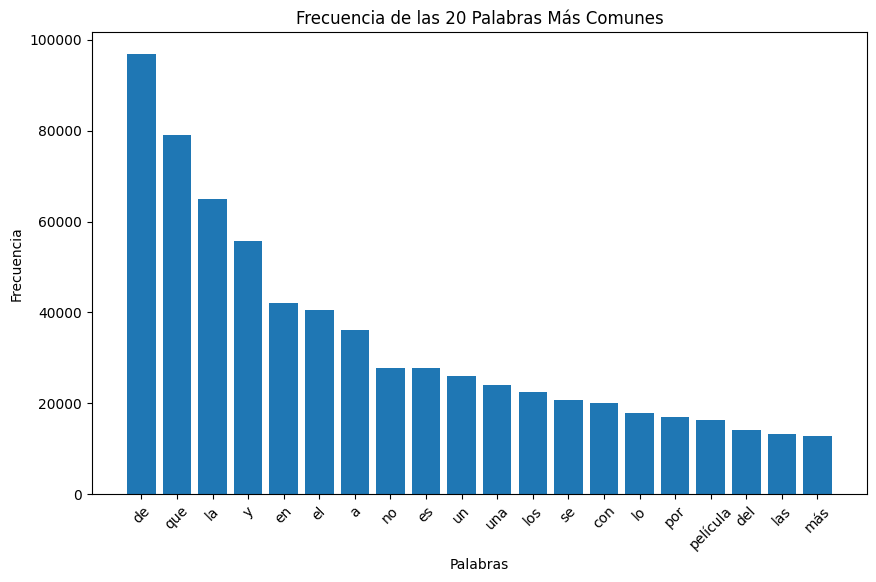

In [56]:
# Contar la frecuencia de las palabras
all_words = [word for sentence in cleaned_corpus for word in sentence]
word_freq = Counter(all_words)

# Mostrar las palabras más comunes
most_common_words = word_freq.most_common(20)
print("Las 20 palabras más comunes:", most_common_words)

# Gráfico de las palabras más comunes
words, counts = zip(*most_common_words)
plt.figure(figsize=(10, 6))
plt.bar(words, counts)
plt.title('Frecuencia de las 20 Palabras Más Comunes')
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

Este análisis confirma la necesidad de limpiar el texto, eliminando stopwords y caracteres no habituales para resaltar palabras más relevantes.

## **Limpieza del texto**

Se utilizara metodos para manejar expresiones regulares y eliminacion de StopWords

In [57]:
# Cargar el modelo en español de spaCy para obtener stopwords
spacy.prefer_gpu()
nlp = spacy.load('es_core_news_sm')
stopwords_spacy = nlp.Defaults.stop_words

# Función de limpieza combinada
def clean_text_advanced(text):
    text = text.lower()                        # Convertir a minúsculas
    text = re.sub(r'http\S+', '', text)        # Eliminar URLs
    text = re.sub(r'[^a-záéíóúñ\s]', '', text) # Eliminar puntuación y caracteres especiales
    tokens = word_tokenize(text)               # Tokenizar con NLTK
    tokens = [word for word in tokens if word not in stopwords_spacy] # Eliminar stopwords con spaCy
    return ' '.join(tokens)                    # Reconstruir el texto limpio

# Aplicar la limpieza combinada
df['cleaned_review_text'] = df['review_text'].apply(lambda x: clean_text_advanced(str(x)))
print("¡Limpieza completada!")


¡Limpieza completada!


In [58]:
# Mostrar un ejemplo antes y después de la limpieza
print("Ejemplo de texto antes y después de la limpieza:")
print("Original:", df['review_text'].iloc[0])
print("Limpio:", df['cleaned_review_text'].iloc[0])

Ejemplo de texto antes y después de la limpieza:
Original: La mayor virtud de esta película es su existencia.El hecho de que podamos jugar con los tópicos más extremos de las identidades patrias (la andaluza y la vasca) sin que nadie se escandalice ni ponga el grito en el cielo, indica mucho de nuestra madurez como nación (pese a quien pese). Bueno, corrijo: el hecho de que podamos jugar y hacer mofa y befa de los tópicos sobre los vascos y el nacionalismo vasco, sin que nadie se escandalice ni ponga el grito en el cielo, indica mucho del grado de normalización de ciertas cuestiones que antes eran llagas abiertas siempre dispuestas a sangrar. Y hago esta corrección, porque los andaluces han sido motivo de guasa siempre y nunca ha pasado nada.Por esto mismo, el planteamiento de "Ocho Apellidos Vascos" es valiente, es oportuno y es oportunista. Seguramente sea esa una de las principales razones por la que los españoles hemos acudido en masa, en una masa casi sin precedentes, a los cines 

##**Tokenización**

In [59]:
# Tokenizar el texto limpio
df['tokenized_cleaned_text'] = df['cleaned_review_text'].apply(lambda x: word_tokenize(x))

# Mostrar ejemplo del texto tokenizado
print("Texto limpio tokenizado (primeras 5 reseñas):")
print(df['tokenized_cleaned_text'].head())
print()
# Obtener todas las palabras del corpus tokenizado
all_words = [word for sentence in df['tokenized_cleaned_text'] for word in sentence]
print("Primeras 20 palabras del corpus completo:")
print(all_words[:20])  # Mostrar las primeras 20 palabras para inspección
print()

# Reconstruir el cleaned_corpus desde la columna 'tokenized_cleaned_text'
cleaned_corpus = df['tokenized_cleaned_text'].tolist()

# Mostrar las primeras 5 oraciones del nuevo cleaned_corpus
print("Primeras 5 oraciones de cleaned_corpus reconstruido:")
print(cleaned_corpus[:5])
print()

print("Primeras 5 oraciones de cleaned_corpus reconstruido enumeradas:")
for i in range(5):
    print(f"{i}. {cleaned_corpus[i]}")

Texto limpio tokenizado (primeras 5 reseñas):
0    [virtud, película, existenciael, podamos, juga...
1    [experto, cinéfilo, sentido, juego, sala, cine...
2    [incondicional, humor, estilo, tele, terminas,...
3    [pasando, gente, deja, modas, gusta, pone, dan...
4    [amanecey, quedo, solosiento, fondoun, mar, va...
Name: tokenized_cleaned_text, dtype: object

Primeras 20 palabras del corpus completo:
['virtud', 'película', 'existenciael', 'podamos', 'jugar', 'tópicos', 'extremos', 'identidades', 'patrias', 'andaluza', 'vasca', 'escandalice', 'ponga', 'grito', 'cielo', 'indica', 'madurez', 'nación', 'pese', 'pese']

Primeras 5 oraciones de cleaned_corpus reconstruido:
[['virtud', 'película', 'existenciael', 'podamos', 'jugar', 'tópicos', 'extremos', 'identidades', 'patrias', 'andaluza', 'vasca', 'escandalice', 'ponga', 'grito', 'cielo', 'indica', 'madurez', 'nación', 'pese', 'pese', 'corrijo', 'podamos', 'jugar', 'mofa', 'befa', 'tópicos', 'vascos', 'nacionalismo', 'vasco', 'escanda

## **Frecuencia de palabras mas comunes luego de la limpieza**

Las 20 palabras más comunes en el corpus limpio:
[('película', 16395), ('cine', 6157), ('historia', 4832), ('personajes', 2834), ('películas', 2721), ('español', 2523), ('guión', 2418), ('actores', 2342), ('personaje', 2076), ('director', 2016), ('film', 1813), ('española', 1709), ('visto', 1647), ('momento', 1550), ('vida', 1534), ('escenas', 1529), ('comedia', 1501), ('momentos', 1434), ('años', 1430), ('espectador', 1403)]


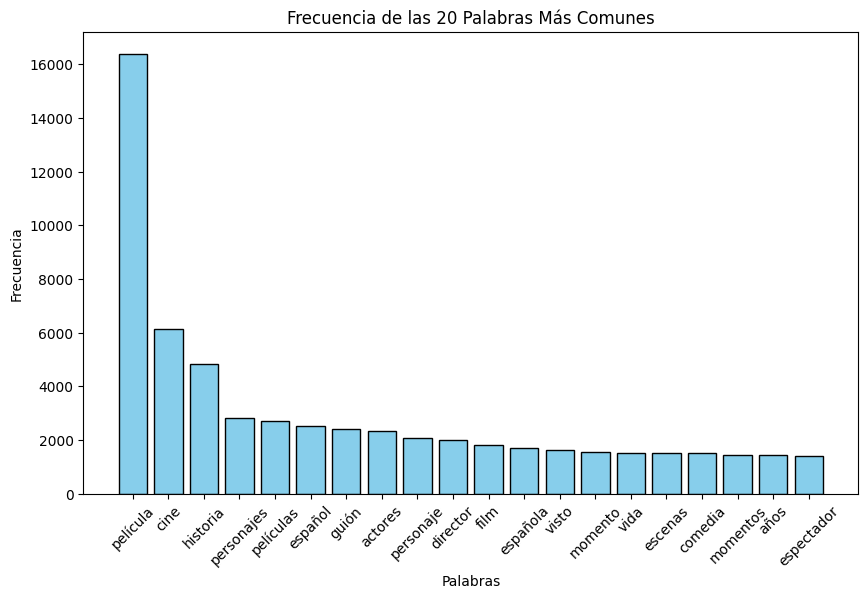

In [60]:
# Contar la frecuencia de palabras en todo el corpus limpio
word_freq = Counter(all_words)

# Obtener las 20 palabras más comunes
most_common_words = word_freq.most_common(20)

# Mostrar las palabras más comunes
print("Las 20 palabras más comunes en el corpus limpio:")
print(most_common_words)

# Graficar las palabras más comunes
words, counts = zip(*most_common_words)
plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='skyblue', edgecolor='black')
plt.title('Frecuencia de las 20 Palabras Más Comunes')
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

## **Distribucion de la longitud de las palabras**

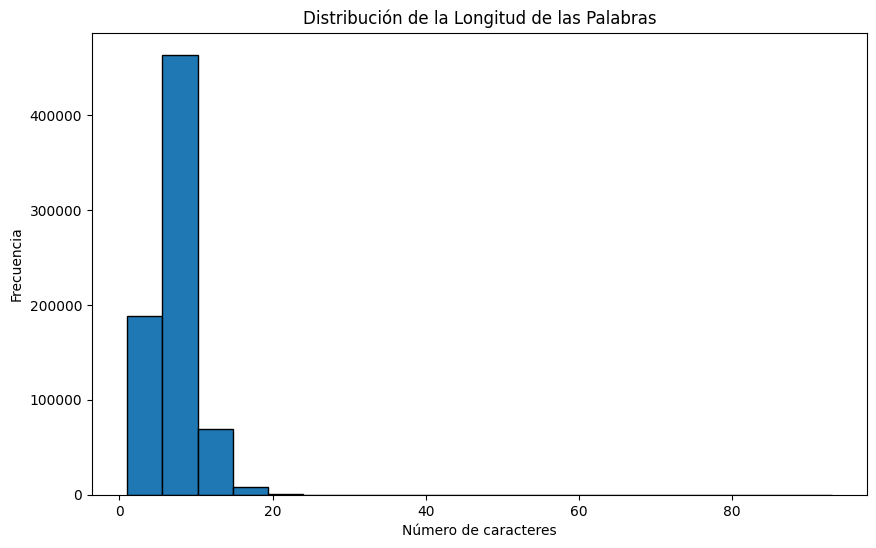

In [ ]:
# Longitud de las palabras
word_lengths = [len(word) for word in all_words]

plt.figure(figsize=(10, 6))
plt.hist(word_lengths, bins=20, edgecolor='black')
plt.title('Distribución de la Longitud de las Palabras')
plt.xlabel('Número de caracteres')
plt.ylabel('Frecuencia')
plt.show()

Número de palabras únicas en el corpus: 73983


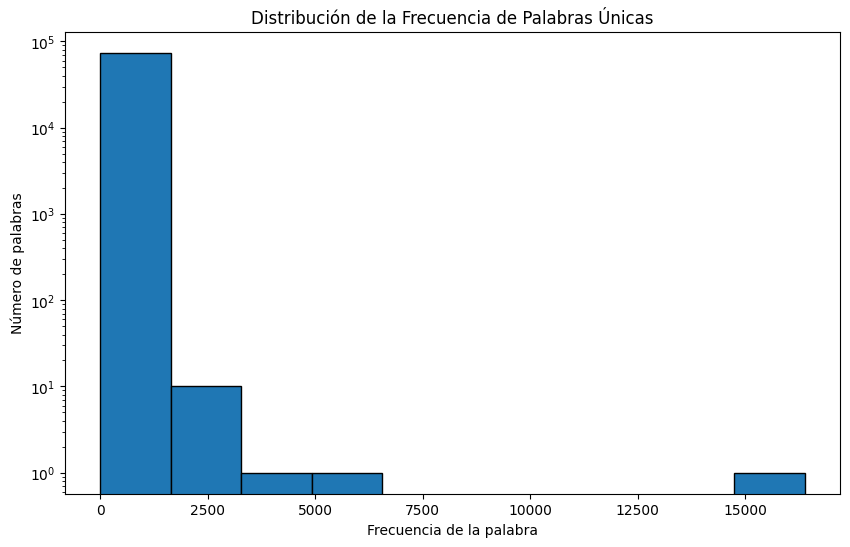

In [ ]:
# Número de palabras únicas
unique_words = set(all_words)
num_unique_words = len(unique_words)
print(f"Número de palabras únicas en el corpus: {num_unique_words}")

# Distribución de frecuencia de palabras únicas
unique_word_freq = [word_freq[word] for word in unique_words]

plt.figure(figsize=(10, 6))
plt.hist(unique_word_freq, bins=10, edgecolor='black')
plt.title('Distribución de la Frecuencia de Palabras Únicas')
plt.xlabel('Frecuencia de la palabra')
plt.ylabel('Número de palabras')
plt.yscale('log')  # Escala logarítmica para mejor visualización
plt.show()

Las 10 partes del discurso más comunes:
[('NOUN', 245692), ('ADJ', 233058), ('VERB', 148863), ('PROPN', 63712), ('ADV', 19752), ('AUX', 7665), ('DET', 3412), ('ADP', 2645), ('NUM', 2335), ('PRON', 1765)]


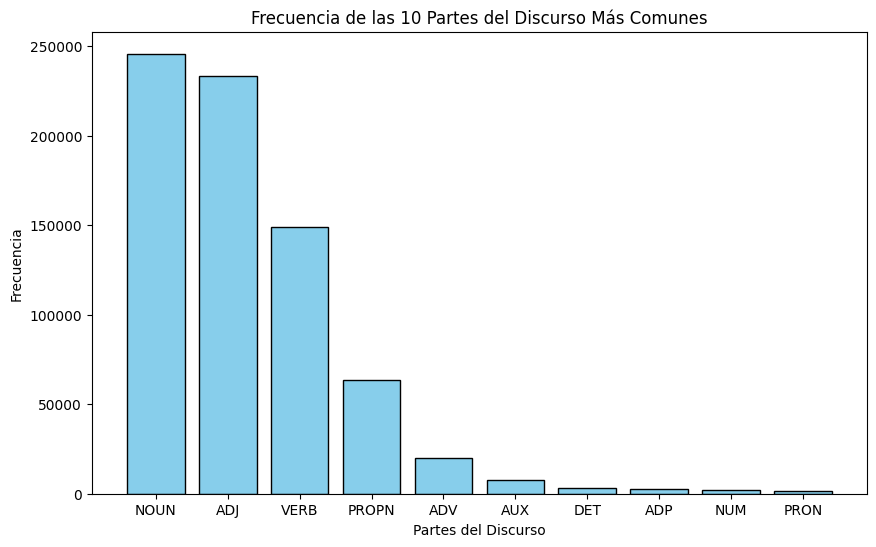

In [ ]:
# Función para obtener las partes del discurso (POS) usando spaCy
def pos_tagging(sentence):
    doc = nlp(" ".join(sentence))  # Reconstruir la oración para procesarla con spaCy
    return [(token.text, token.pos_) for token in doc]  # Devolver el token y su POS

# Aplicar POS tagging al corpus tokenizado
pos_tagged_corpus = [pos_tagging(sentence) for sentence in df['tokenized_cleaned_text']]

# Contar la frecuencia de las partes del discurso
pos_counts = Counter([pos for sentence in pos_tagged_corpus for _, pos in sentence])

# Mostrar las 10 partes del discurso más comunes
most_common_pos = pos_counts.most_common(10)
print("Las 10 partes del discurso más comunes:")
print(most_common_pos)

# Graficar las partes del discurso más comunes
pos, counts = zip(*most_common_pos)
plt.figure(figsize=(10, 6))
plt.bar(pos, counts, color='skyblue', edgecolor='black')
plt.title('Frecuencia de las 10 Partes del Discurso Más Comunes')
plt.xlabel('Partes del Discurso')
plt.ylabel('Frecuencia')
plt.show()


Este análisis confirma que el corpus está bien balanceado para tareas relacionadas con descripción y evaluación (sustantivos y adjetivos predominantes).
Los adjetivos serán clave para entender el tono y la polaridad en las reseñas.

Estadísticas descriptivas de la longitud promedio de las palabras por reseña:
count    8601.000000
mean        7.370133
std         0.505824
min         5.000000
25%         7.063158
50%         7.365079
75%         7.669811
max        17.666667
Name: word_length, dtype: float64


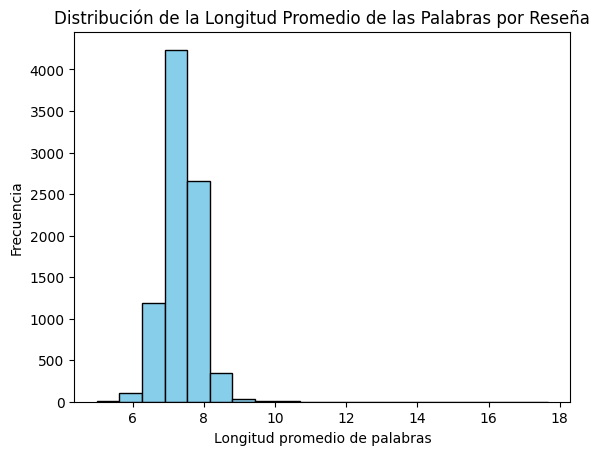

In [ ]:
# Calcular la longitud promedio de las palabras por reseña usando cleaned_corpus
df['word_length'] = [np.mean([len(word) for word in sentence]) for sentence in cleaned_corpus]

# Estadísticas descriptivas
print("Estadísticas descriptivas de la longitud promedio de las palabras por reseña:")
print(df['word_length'].describe())

# Visualización: Histograma de la longitud promedio de las palabras por reseña
plt.hist(df['word_length'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución de la Longitud Promedio de las Palabras por Reseña')
plt.xlabel('Longitud promedio de palabras')
plt.ylabel('Frecuencia')
plt.show()

La longitud promedio de las palabras es consistente con el idioma español, donde muchas palabras tienen entre 6 y 8 caracteres. Las palabras más largas pueden deberse a nombres propios o palabras técnicas específicas.

In [ ]:
# Calcular la longitud promedio de todas las palabras en el corpus (global)
global_word_length = np.mean([len(word) for word in all_words])
print(f"Longitud promedio de todas las palabras en el corpus: {global_word_length:.2f}")

Longitud promedio de todas las palabras en el corpus: 7.38


Estadísticas descriptivas de las palabras únicas por reseña:
count    8601.000000
mean       76.370306
std        54.013794
min         2.000000
25%        37.000000
50%        61.000000
75%       102.000000
max       400.000000
Name: unique_word_count, dtype: float64


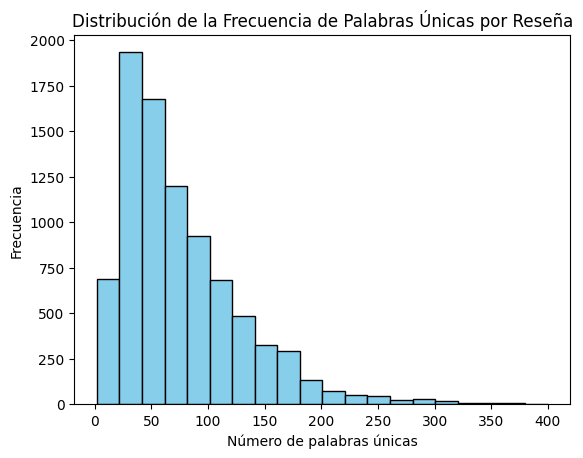

In [ ]:
# Calcular la cantidad de palabras únicas por reseña
df['unique_word_count'] = [len(set(sentence)) for sentence in cleaned_corpus]

# Estadísticas descriptivas
print("Estadísticas descriptivas de las palabras únicas por reseña:")
print(df['unique_word_count'].describe())

# Visualización: Histograma de palabras únicas
plt.hist(df['unique_word_count'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución de la Frecuencia de Palabras Únicas por Reseña')
plt.xlabel('Número de palabras únicas')
plt.ylabel('Frecuencia')
plt.show()

Las reseñas tienen un rango variado de palabras únicas, con una buena cantidad de diversidad en el lenguaje, lo cual será útil para modelado y análisis.

In [ ]:
# Calcular la cantidad total de palabras únicas en el corpus completo
unique_word_count_global = len(set(all_words))
print(f"Número total de palabras únicas en el corpus: {unique_word_count_global}")

Número total de palabras únicas en el corpus: 73983


Los 10 bigramas más comunes: [(('cine', 'español'), 1687), (('película', 'española'), 469), (('santiago', 'segura'), 468), (('banda', 'sonora'), 432), (('dani', 'rovira'), 430), (('apellidos', 'vascos'), 399), (('guerra', 'civil'), 378), (('efectos', 'especiales'), 354), (('karra', 'elejalde'), 345), (('belén', 'rueda'), 338)]
Los 10 trigramas más comunes: [(('guerra', 'civil', 'española'), 98), (('juan', 'antonio', 'bayona'), 95), (('proyecto', 'bruja', 'blair'), 80), (('historia', 'cine', 'español'), 79), (('aventuras', 'tadeo', 'jones'), 76), (('pilar', 'lópez', 'ayala'), 75), (('mejores', 'películas', 'españolas'), 59), (('basada', 'hechos', 'reales'), 58), (('rosa', 'maría', 'sardá'), 55), (('alberto', 'san', 'juan'), 55)]


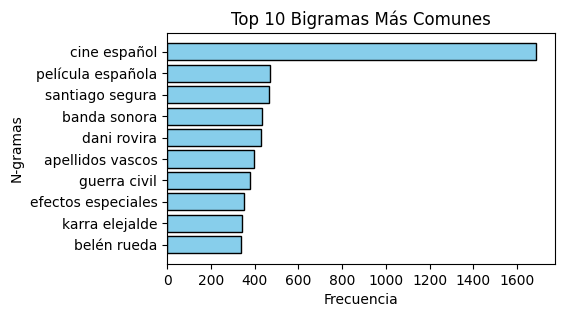

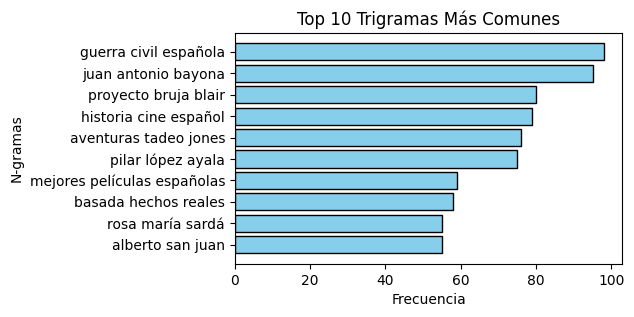

In [ ]:
# Función para generar n-gramas
def generate_ngrams(corpus, n):
    # Genera una lista de n-gramas a partir del corpus tokenizado.
    ngrams_list = []
    for sentence in corpus:
        ngrams_list.extend(list(ngrams(sentence, n)))
    return ngrams_list

# Generar bigramas y trigramas
bigrams = generate_ngrams(cleaned_corpus, 2)
trigrams = generate_ngrams(cleaned_corpus, 3)

# Contar la frecuencia de los n-gramas
bigram_freq = Counter(bigrams)
trigram_freq = Counter(trigrams)

# Mostrar los bigramas y trigramas más comunes
most_common_bigrams = bigram_freq.most_common(10)
most_common_trigrams = trigram_freq.most_common(10)

print("Los 10 bigramas más comunes:", most_common_bigrams)
print("Los 10 trigramas más comunes:", most_common_trigrams)

# Función para graficar n-gramas
def plot_ngrams(most_common_ngrams, title):
    ngrams, counts = zip(*most_common_ngrams)  # Extraer los n-gramas y sus frecuencias
    ngrams = [' '.join(gram) for gram in ngrams]  # Convertir los n-gramas a cadenas
    plt.figure(figsize=(5, 3))
    plt.barh(ngrams, counts, color='skyblue', edgecolor='black')  # Gráfico horizontal
    plt.title(title)
    plt.xlabel('Frecuencia')
    plt.ylabel('N-gramas')
    plt.gca().invert_yaxis()  # Invertir el eje para mostrar los n-gramas más frecuentes primero
    plt.show()

# Graficar los bigramas más comunes
plot_ngrams(most_common_bigrams, 'Top 10 Bigramas Más Comunes')

print()

# Graficar los trigramas más comunes
plot_ngrams(most_common_trigrams, 'Top 10 Trigramas Más Comunes')


El análisis de bigramas muestra un enfoque temático bien definido en las reseñas, donde los usuarios destacan géneros, actores y características del cine español. Esto refuerza la idea de que el corpus tiene una alta relevancia para estudios relacionados con esta temática.

El análisis de trigramas confirma un enfoque temático bien definido y una mezcla de conceptos generales (como "historia cine español") y elementos específicos (nombres propios y títulos). Este nivel de detalle puede ser útil para tareas de clasificación temática o análisis semántico.

Estadísticas descriptivas de la diversidad léxica por reseña:
count    8601.000000
mean        0.920722
std         0.055682
min         0.408257
25%         0.885714
50%         0.926554
75%         0.961538
max         1.000000
Name: lexical_diversity, dtype: float64


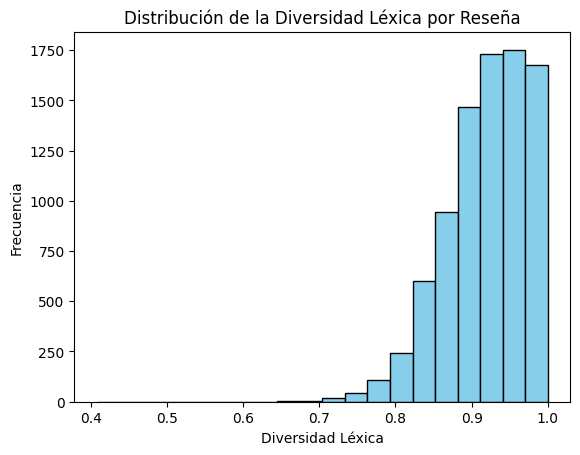

In [ ]:
# Calcular la diversidad léxica por reseña
df['lexical_diversity'] = [
    len(set(sentence)) / len(sentence) if len(sentence) > 0 else 0
    for sentence in cleaned_corpus
]

# Estadísticas descriptivas
print("Estadísticas descriptivas de la diversidad léxica por reseña:")
print(df['lexical_diversity'].describe())

# Visualización: Histograma de la diversidad léxica
plt.hist(df['lexical_diversity'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución de la Diversidad Léxica por Reseña')
plt.xlabel('Diversidad Léxica')
plt.ylabel('Frecuencia')
plt.show()

El corpus tiene una alta diversidad léxica en general, lo que refleja que los usuarios tienden a usar vocabulario variado en sus reseñas. Este hallazgo es consistente con la riqueza del idioma español y es útil para tareas de modelado donde la variedad de vocabulario es importante.

In [ ]:
# Calcular la diversidad léxica global
unique_words = len(set(all_words))  # Palabras únicas
total_words = len(all_words)        # Palabras totales
lexical_diversity_global = unique_words / total_words if total_words > 0 else 0

print(f"Diversidad léxica global del corpus: {lexical_diversity_global:.4f}")

Diversidad léxica global del corpus: 0.1013


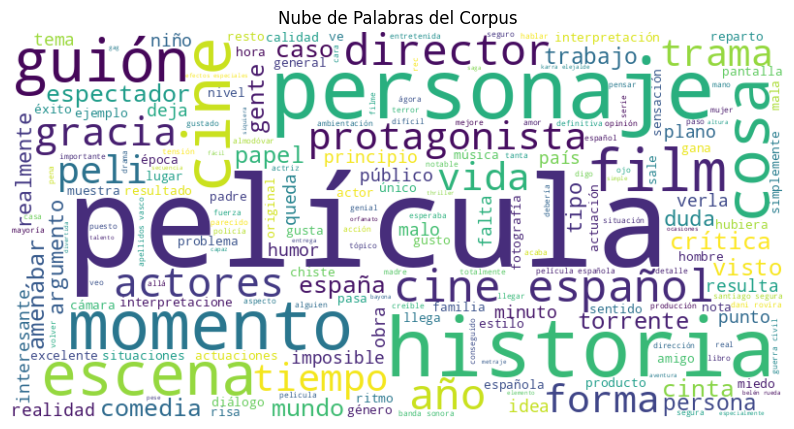

In [ ]:
# Generar la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(all_words))

# Mostrar la nube de palabras
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras del Corpus')
plt.show()

Palabras más destacadas:

"película" y "personaje" son las palabras más prominentes, lo que refleja el tema principal del corpus (reseñas de películas).
Otros términos frecuentes como "historia", "momento", "cine", y "escena" muestran el enfoque en aspectos narrativos y cinematográficos.
Temática general:

La nube de palabras resalta términos asociados con crítica y análisis cinematográfico, como "guion", "director", y "actores".
Se observan menciones a géneros como "comedia" y palabras relacionadas con emociones o evaluaciones, como "vida", "gracia", y "crítica".

##Conclusión del Análisis Exploratorio
**Resumen general:**

El corpus tiene una alta diversidad léxica y está dominado por términos relacionados con el cine, tanto en aspectos técnicos como narrativos.
Los bigramas y trigramas muestran un enfoque temático consistente, destacando nombres propios, títulos de películas y conceptos relacionados con el cine español.

**Implicaciones:**

La riqueza léxica y la estructura temática del corpus lo hacen adecuado para tareas de análisis de sentimientos, modelado de temas o clasificación.

#**Se implementará Análisis de Sentimiento basado en las reseñas**

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

##**Preparación del Dataset**
Descripción:

Extraeremos las columnas necesarias: cleaned_review_text (reseñas preprocesadas) y review_rate (para crear las categorías de sentimiento).

Primero creamos la columna clasificacion con tres categorías: positiva, neutra y negativa.

In [62]:
# Crear la columna 'clasificacion' con los criterios acordados
def clasificar_review(rate):
    if rate < 5:
        return -1  # Negativo
    elif 5 <= rate <= 7:
        return 0   # Neutro
    else:
        return 1   # Positivo

# Aplicar la función para clasificar
df['clasificacion'] = df['review_rate'].apply(clasificar_review)

# Verificar la distribución
print("Distribución de clasificacion (numérica):")
print(df['clasificacion'].value_counts())



Distribución de clasificacion (numérica):
clasificacion
 0    3516
 1    2638
-1    2447
Name: count, dtype: int64


In [63]:
# Crear una nueva columna con nombres descriptivos
df['nombre_clasificacion'] = df['clasificacion'].map({-1: 'Negativo', 0: 'Neutro', 1: 'Positivo'})

# Verificamos los nuevos datos
print(df[['review_rate', 'clasificacion', 'nombre_clasificacion']].head(50))

    review_rate  clasificacion nombre_clasificacion
0           3.0             -1             Negativo
1           2.0             -1             Negativo
2           2.0             -1             Negativo
3           2.0             -1             Negativo
4           2.0             -1             Negativo
5           8.0              1             Positivo
6           3.0             -1             Negativo
7           3.0             -1             Negativo
8           1.0             -1             Negativo
9           1.0             -1             Negativo
10          1.0             -1             Negativo
11          1.0             -1             Negativo
12          6.0              0               Neutro
13          3.0             -1             Negativo
14          4.0             -1             Negativo
15          3.0             -1             Negativo
16          6.0              0               Neutro
17          5.0              0               Neutro
18          

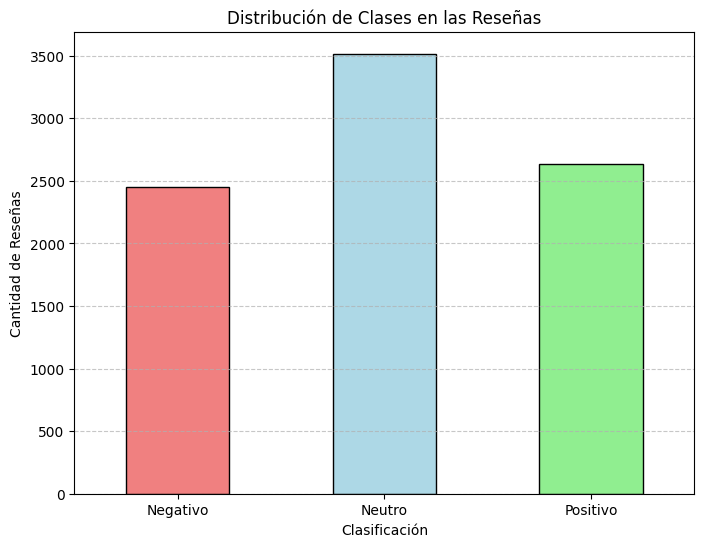

In [65]:
# Distribución de las clases
clasificacion_counts = df['nombre_clasificacion'].value_counts()

# Reordenar las categorías en el gráfico
clasificacion_counts = clasificacion_counts.reindex(['Negativo', 'Neutro', 'Positivo'])

# Gráfico de barras
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
clasificacion_counts.plot(kind='bar', color=['lightcoral', 'lightblue', 'lightgreen'], edgecolor='black')
plt.title('Distribución de Clases en las Reseñas')
plt.xlabel('Clasificación')
plt.ylabel('Cantidad de Reseñas')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


##**División de los Datos**

Definimos las variables:

X: Las reseñas (cleaned_review_text).

y: Las clasificaciones (clasificacion).

Dividimos los datos en conjunto de entrenamiento y prueba (80%-20%).

In [ ]:
from sklearn.model_selection import train_test_split

# Definir las variables
X = df['cleaned_review_text']  # Reseñas limpias
y = df['clasificacion']        # Clasificaciones

# División del dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Renombrar las clases para la salida interpretativa
nombres_clases = {'Negativo': -1, 'Neutro': 0, 'Positivo': 1}

# Verificar la distribución en los conjuntos
print("Distribución en el conjunto de entrenamiento:")
print(y_train.replace(nombres_clases).value_counts(normalize=True).rename(index={-1: 'Negativo', 0: 'Neutro', 1: 'Positivo'}))
print("\nDistribución en el conjunto de prueba:")
print(y_test.replace(nombres_clases).value_counts(normalize=True).rename(index={-1: 'Negativo', 0: 'Neutro', 1: 'Positivo'}))


Distribución en el conjunto de entrenamiento:
clasificacion
Neutro      0.407849
Positivo    0.309448
Negativo    0.282703
Name: proportion, dtype: float64

Distribución en el conjunto de prueba:
clasificacion
Neutro      0.412551
Positivo    0.295758
Negativo    0.291691
Name: proportion, dtype: float64


Estas proporciones son muy similares entre los conjuntos de entrenamiento y prueba, lo cual es bueno porque asegura que el modelo será evaluado con datos que siguen la misma distribución que los datos con los que fue entrenado.

##**Vectorización con TF-IDF**

Descripción: Utilizamos TF-IDF para convertir las reseñas de texto en datos numéricos que puedan ser procesados por el modelo de machine learning.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inicializar el vectorizador TF-IDF
vectorizador_tfidf = TfidfVectorizer(max_features=5000)  # Limitar a 5000 características más relevantes

# Ajustar y transformar las reseñas de entrenamiento
X_train_tfidf = vectorizador_tfidf.fit_transform(X_train)

# Transformar las reseñas de prueba
X_test_tfidf = vectorizador_tfidf.transform(X_test)

# Verificar el vocabulario creado
print("Vocabulario TF-IDF:")
print(vectorizador_tfidf.get_feature_names_out()[:50])  # Mostrar las primeras 10 palabras


Vocabulario TF-IDF:
['abajo' 'abandonar' 'abarcar' 'abierta' 'abierto' 'aborda' 'abordar'
 'abre' 'abrir' 'absoluta' 'absolutamente' 'absoluto' 'absurda' 'absurdas'
 'absurdo' 'absurdos' 'abuela' 'abundan' 'aburre' 'aburrida' 'aburrido'
 'aburridos' 'aburrimiento' 'aburrir' 'abusa' 'abuso' 'abusos' 'acaba'
 'acabado' 'acaban' 'acabar' 'acabará' 'acabas' 'acabe' 'acabo' 'acabó'
 'academia' 'acaso' 'accidente' 'acciones' 'acción' 'acento' 'aceptable'
 'aceptables' 'aceptar' 'acerca' 'acercamiento' 'acercarse' 'acertada'
 'acertado']


##**Entrenamiento del Modelo de Análisis de Sentimiento**

Usaremos **Regresión Logística** como modelo base para predecir los sentimientos.

Entrenaremos el modelo con las reseñas vectorizadas (TF-IDF) y evaluaremos su desempeño.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Inicializar y entrenar el modelo
modelo = LogisticRegression(random_state=42, max_iter=1000)
modelo.fit(X_train_tfidf, y_train)

# Predicciones en el conjunto de prueba
y_pred = modelo.predict(X_test_tfidf)

# Evaluación del modelo
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred, target_names=["Negativo", "Neutro", "Positivo"]))

# Precisión general
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.2f}")


Reporte de clasificación:
              precision    recall  f1-score   support

    Negativo       0.72      0.66      0.69       502
      Neutro       0.61      0.68      0.64       710
    Positivo       0.66      0.61      0.64       509

    accuracy                           0.65      1721
   macro avg       0.66      0.65      0.65      1721
weighted avg       0.66      0.65      0.65      1721

Precisión del modelo: 0.65


##**Evaluación y Resultados**

Visualización de la Matriz de Confusión Representar gráficamente cómo se clasificaron las categorías.

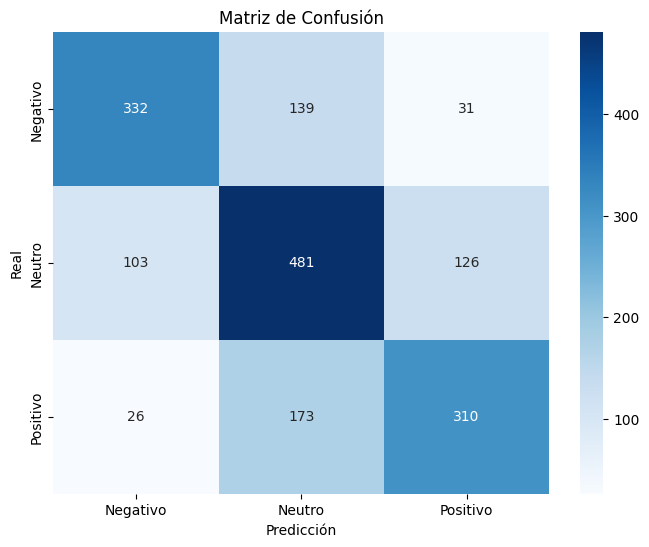

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de confusión
matriz_confusion = confusion_matrix(y_test, y_pred)

# Visualizar la matriz
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', xticklabels=["Negativo", "Neutro", "Positivo"], yticklabels=["Negativo", "Neutro", "Positivo"])
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()


##**Optimización del modelo**

Optimizaremos el modelo con el metodo GridSearchCV y compareremos los resultados.

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Mejores parámetros encontrados: {'C': 1, 'solver': 'liblinear'}
Reporte de Clasificación del Modelo Optimizado:
              precision    recall  f1-score   support

    Negativo       0.72      0.66      0.69       502
      Neutro       0.60      0.67      0.63       710
    Positivo       0.65      0.60      0.62       509

    accuracy                           0.65      1721
   macro avg       0.66      0.64      0.65      1721
weighted avg       0.65      0.65      0.65      1721



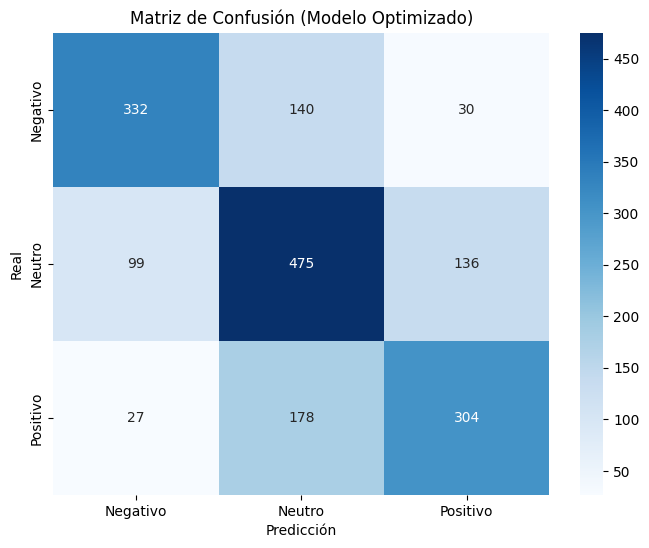

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

modelo = LogisticRegression(max_iter=1000, random_state=42)

# Definimos hiperparámetros para ajustar
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}

# Configuracion de GridSearchCV
grid_search = GridSearchCV(estimator=modelo, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train_tfidf, y_train)

# Imprimimos los mejores parámetros
print("Mejores parámetros encontrados:", grid_search.best_params_)

# Entrenamos el modelo optimizado
modelo_optimizado = grid_search.best_estimator_

# Predicciones con el modelo optimizado
y_pred_optimizado = modelo_optimizado.predict(X_test_tfidf)

# Reporte de clasificación
print("Reporte de Clasificación del Modelo Optimizado:")
print(classification_report(y_test, y_pred_optimizado, target_names=['Negativo', 'Neutro', 'Positivo']))

# Imprimimos Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_optimizado, labels=[-1, 0, 1])

# Graficamos la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Negativo', 'Neutro', 'Positivo'], yticklabels=['Negativo', 'Neutro', 'Positivo'])
plt.title("Matriz de Confusión (Modelo Optimizado)")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()


##**Conclusión sobre el Modelado y las Métricas**

**Conclusión**

El modelo de Regresión Logística alcanzó una precisión general del 65%, mostrando un desempeño equilibrado entre las clases. Tras la optimización, se lograron mejoras leves en precisión y recall, especialmente en las clases negativas y positivas. Sin embargo, la clase neutra sigue siendo problemática, posiblemente por la superposición de características. Aunque el modelo es funcional para análisis de sentimiento básico, se sugiere explorar enfoques más avanzados, como redes neuronales, y mejorar el dataset para lograr resultados más robustos.

#**Modelo Utilizando Redes Neuronales**

##**Definición del problema**

El objetivo del modelo basado en redes neuronales es mejorar la precisión del análisis de sentimientos.

Entrada: Texto de las reseñas procesado en secuencias numéricas.

Salida: Etiquetas categóricas mapeadas como:

- Negativo (0)

- Neutro (1)

- Positivo (2)

Arquitectura seleccionada: RNN con una capa de LSTM para capturar el contexto secuencial de las palabras en las reseñas.


#**Cargar del dataset** (Desde la URL de GitHub)

In [66]:
# Se lee el archivo desde GitHub
df = pd.read_csv(
    'https://github.com/tdiego74/Clase_Data_Science_III_PBLC/raw/main/reviews_filmaffinity.csv',
    sep=r'\|\|',
    engine='python',
    quoting=3
)

# Mostrar las primeras filas del dataset
print("Primeras filas del dataset:")
print(df.head())

# Mostrar la estructura del dataset
print("\nInformación general del dataset:")
print(df.info())

Primeras filas del dataset:
               film_name   gender film_avg_rate  review_rate  \
0  Ocho apellidos vascos  Comedia           6,0          3.0   
1  Ocho apellidos vascos  Comedia           6,0          2.0   
2  Ocho apellidos vascos  Comedia           6,0          2.0   
3  Ocho apellidos vascos  Comedia           6,0          2.0   
4  Ocho apellidos vascos  Comedia           6,0          2.0   

                                        review_title  \
0     OCHO APELLIDOS VASCOS...Y NINGÚN NOMBRE PROPIO   
1                                     El perro verde   
2  Si no eres de comer mierda... no te comas esta...   
3                                    Aida: The movie   
4               UN HOMBRE SOLO (Julio Iglesias 1987)   

                                         review_text  
0  La mayor virtud de esta película es su existen...  
1  No soy un experto cinéfilo, pero pocas veces m...  
2  Si no eres un incondicional del humor estilo T...  
3  No sé qué está pasando, si 

##**Crear las etiquetas numéricas y alfanuméricas**

**Etiqueta Numérica (Etiqueta_Numerica):**

0 para calificaciones de 0 a 4 (Negativas).

1 para calificaciones de 5 a 7 (Neutras).

2 para calificaciones de 8 a 10 (Positivas).

**Etiqueta Alfanumérica (Etiqueta_alfanumerica):**

"Negativa", "Neutra" y "Positiva" como texto descriptivo.

In [67]:
# Función para asignar etiquetas numéricas
def asignar_etiqueta_numerica(rate):
    if 0 <= rate <= 4:
        return 0  # Negativa
    elif 5 <= rate <= 7:
        return 1  # Neutra
    elif 8 <= rate <= 10:
        return 2  # Positiva
    else:
        return None  # Para valores inesperados

# Función para asignar etiquetas alfanuméricas
def asignar_etiqueta_alfanumerica(rate):
    if 0 <= rate <= 4:
        return "Negativa"
    elif 5 <= rate <= 7:
        return "Neutra"
    elif 8 <= rate <= 10:
        return "Positiva"
    else:
        return "Desconocida"

# Aplicamos las funciones al DataFrame
df['Etiqueta_Numerica'] = df['review_rate'].apply(asignar_etiqueta_numerica)
df['Etiqueta_alfanumerica'] = df['review_rate'].apply(asignar_etiqueta_alfanumerica)

# Mostramos las primeras filas con las nuevas columnas
print("Dataset con las nuevas etiquetas:")
print(df[['review_rate', 'Etiqueta_Numerica', 'Etiqueta_alfanumerica']].head())


Dataset con las nuevas etiquetas:
   review_rate  Etiqueta_Numerica Etiqueta_alfanumerica
0          3.0                0.0              Negativa
1          2.0                0.0              Negativa
2          2.0                0.0              Negativa
3          2.0                0.0              Negativa
4          2.0                0.0              Negativa


In [68]:
# Mostrar las primeras filas del dataset
df.head()

,film_name,gender,film_avg_rate,review_rate,review_title,review_text,Etiqueta_Numerica,Etiqueta_alfanumerica
0,Ocho apellidos vascos,Comedia,"6,0",3.0,OCHO APELLIDOS VASCOS...Y NINGÚN NOMBRE PROPIO,La mayor virtud de esta película es su existen...,0.0,Negativa
1,Ocho apellidos vascos,Comedia,"6,0",2.0,El perro verde,"No soy un experto cinéfilo, pero pocas veces m...",0.0,Negativa
2,Ocho apellidos vascos,Comedia,"6,0",2.0,Si no eres de comer mierda... no te comas esta...,Si no eres un incondicional del humor estilo T...,0.0,Negativa
3,Ocho apellidos vascos,Comedia,"6,0",2.0,Aida: The movie,"No sé qué está pasando, si la gente se deja ll...",0.0,Negativa
4,Ocho apellidos vascos,Comedia,"6,0",2.0,UN HOMBRE SOLO (Julio Iglesias 1987),"""Pero cuando amanece,y me quedo solo,siento en...",0.0,Negativa


In [69]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8603 entries, 0 to 8602
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   film_name              8603 non-null   object 
 1   gender                 8603 non-null   object 
 2   film_avg_rate          8603 non-null   object 
 3   review_rate            8601 non-null   float64
 4   review_title           8603 non-null   object 
 5   review_text            8603 non-null   object 
 6   Etiqueta_Numerica      8601 non-null   float64
 7   Etiqueta_alfanumerica  8603 non-null   object 
dtypes: float64(2), object(6)
memory usage: 537.8+ KB
None


In [70]:
#Eliminamos registros con valores nulos de reseñas
df = df.dropna(subset=['review_rate'])

In [71]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 8601 entries, 0 to 8602
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   film_name              8601 non-null   object 
 1   gender                 8601 non-null   object 
 2   film_avg_rate          8601 non-null   object 
 3   review_rate            8601 non-null   float64
 4   review_title           8601 non-null   object 
 5   review_text            8601 non-null   object 
 6   Etiqueta_Numerica      8601 non-null   float64
 7   Etiqueta_alfanumerica  8601 non-null   object 
dtypes: float64(2), object(6)
memory usage: 604.8+ KB
None


In [72]:
# Convertir las etiquetas numéricas a enteros
df['Etiqueta_Numerica'] = df['Etiqueta_Numerica'].astype(int)

# Verificar el tipo de dato
print("Tipos de datos después de la conversión:")
print(df.dtypes)

Tipos de datos después de la conversión:
film_name                 object
gender                    object
film_avg_rate             object
review_rate              float64
review_title              object
review_text               object
Etiqueta_Numerica          int64
Etiqueta_alfanumerica     object
dtype: object


##**Preprocesaniento del texto**

Preparacion de la columna review_text, que contiene las reseñas, para que sea apta como entrada para el modelo RNN utilizando:

**Tokenización:**

Convertir las palabras en números, para que las entienda la rede neuronal

**Padding:**

Asegurar que todas las reseñas tengan la misma longitud, rellenando con ceros (o truncando las más largas).

**Dividir el dataset:**

Separar los datos en conjuntos de entrenamiento y prueba.

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Definimos el tamaño del vocabulario
vocab_size = 10000  # Máximo de palabras únicas a considerar

# Inicializamos el tokenizador
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")  # Token para palabras fuera de vocabulario

# Ajustamos el tokenizador a los textos
tokenizer.fit_on_texts(df['review_text'])

# Convertimos las reseñas en secuencias numéricas
sequences = tokenizer.texts_to_sequences(df['review_text'])

# Verificamos la primera secuencia como ejemplo
print("Primera reseña tokenizada:", sequences[0])

# Guardamos el diccionario de palabras
word_index = tokenizer.word_index
print("Cantidad de palabras únicas en el tokenizador:", len(word_index))


Primera reseña tokenizada: [4, 278, 2100, 2, 29, 18, 10, 25, 2342, 7, 97, 2, 3, 3227, 1426, 15, 13, 338, 21, 3490, 2, 20, 1, 6219, 4, 4229, 5, 4, 1420, 35, 3, 260, 14, 1, 43, 2547, 7, 3086, 6, 7, 1372, 5974, 56, 2, 380, 3228, 23, 4947, 467, 8, 245, 467, 141, 1, 7, 97, 2, 3, 3227, 1426, 5, 79, 8020, 5, 1, 2, 13, 338, 62, 13, 347, 5, 7, 5975, 727, 35, 3, 260, 14, 1, 43, 2547, 7, 3086, 6, 7, 1372, 5974, 56, 19, 2588, 2, 1, 2, 994, 2735, 3, 226, 606, 1, 9546, 94, 1, 8, 1, 5, 2313, 29, 4230, 48, 13, 1195, 96, 142, 1217, 2, 7285, 94, 5, 184, 34, 299, 57, 17, 98, 123, 7, 1395, 2, 547, 330, 347, 10, 1496, 10, 6706, 5, 10, 5230, 807, 100, 109, 12, 2, 20, 973, 1568, 17, 4, 3, 13, 387, 560, 9547, 6, 2486, 6, 12, 2486, 143, 35, 4948, 8, 13, 1569, 8, 50, 46, 377, 1, 17, 1440, 350, 109, 486, 15, 4, 1497, 1843, 2, 861, 89, 13, 591, 5, 13, 1, 19, 2415, 5, 4, 1165, 5, 4231, 1320, 2, 1376, 4, 218, 9548, 5, 1, 58, 10, 30, 16, 3, 391, 8445, 2, 46, 2487, 28, 8, 55, 247, 94, 403, 5, 2980, 58, 2, 7, 1465, 35

##**Padding**

Aseguramos que todas las reseñas tengan la misma longitud

In [ ]:
# Definimos la longitud máxima de las secuencias
max_length = 100

# Aplicamos padding a las secuencias
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post')

# Verificamos la primera secuencia antes y después del padding
print("Primera secuencia tokenizada original:", sequences[0])
print("Primera secuencia después del padding:", padded_sequences[0])

# Verificamos el tamaño del tensor resultante
print("Forma del tensor después del padding:", padded_sequences.shape)


Primera secuencia tokenizada original: [4, 278, 2100, 2, 29, 18, 10, 25, 2342, 7, 97, 2, 3, 3227, 1426, 15, 13, 338, 21, 3490, 2, 20, 1, 6219, 4, 4229, 5, 4, 1420, 35, 3, 260, 14, 1, 43, 2547, 7, 3086, 6, 7, 1372, 5974, 56, 2, 380, 3228, 23, 4947, 467, 8, 245, 467, 141, 1, 7, 97, 2, 3, 3227, 1426, 5, 79, 8020, 5, 1, 2, 13, 338, 62, 13, 347, 5, 7, 5975, 727, 35, 3, 260, 14, 1, 43, 2547, 7, 3086, 6, 7, 1372, 5974, 56, 19, 2588, 2, 1, 2, 994, 2735, 3, 226, 606, 1, 9546, 94, 1, 8, 1, 5, 2313, 29, 4230, 48, 13, 1195, 96, 142, 1217, 2, 7285, 94, 5, 184, 34, 299, 57, 17, 98, 123, 7, 1395, 2, 547, 330, 347, 10, 1496, 10, 6706, 5, 10, 5230, 807, 100, 109, 12, 2, 20, 973, 1568, 17, 4, 3, 13, 387, 560, 9547, 6, 2486, 6, 12, 2486, 143, 35, 4948, 8, 13, 1569, 8, 50, 46, 377, 1, 17, 1440, 350, 109, 486, 15, 4, 1497, 1843, 2, 861, 89, 13, 591, 5, 13, 1, 19, 2415, 5, 4, 1165, 5, 4231, 1320, 2, 1376, 4, 218, 9548, 5, 1, 58, 10, 30, 16, 3, 391, 8445, 2, 46, 2487, 28, 8, 55, 247, 94, 403, 5, 2980, 58, 2,

##**Dividimos los datos en entrenamiento y prueba**

In [ ]:
from sklearn.model_selection import train_test_split

# Dividir las secuencias y etiquetas en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    padded_sequences, df['Etiqueta_Numerica'], test_size=0.2, random_state=42
)

# Verificar las formas de los conjuntos resultantes
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)


Tamaño del conjunto de entrenamiento: (6880, 100)
Tamaño del conjunto de prueba: (1721, 100)


Distribución de clases:
Etiqueta_Numerica
1    3516
2    2638
0    2447
Name: count, dtype: int64


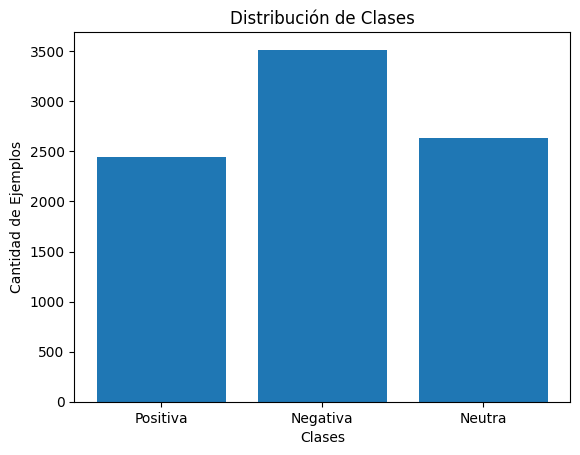

In [ ]:
# Contar los ejemplos por clase
distribucion_clases = df['Etiqueta_Numerica'].value_counts()

# Mostrar la distribución
print("Distribución de clases:")
print(distribucion_clases)

# Visualizar con un gráfico de barras
import matplotlib.pyplot as plt

plt.bar(distribucion_clases.index, distribucion_clases.values, tick_label=['Negativa', 'Neutra', 'Positiva'])
plt.title('Distribución de Clases')
plt.xlabel('Clases')
plt.ylabel('Cantidad de Ejemplos')
plt.show()

#**Configuramos de la RNN**

**Capa de Embedding:**

Convierte las palabras en vectores densos para que el modelo entienda las relaciones entre ellas.

**Capa recurrente (LSTM):**

Procesa las secuencias considerando la relación entre palabras en diferentes posiciones.

**Capa densa:**

Genera la predicción final (clase: 0, 1 o 2).

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.layers import Dropout


# Construir el modelo actualizado
model = Sequential([
    # Capa de Embedding (sin input_length)
    Embedding(input_dim=10000, output_dim=32),

    # Capa LSTM
    LSTM(32, return_sequences=False),

    # Regularizacion
    #Dropout(0.6),

    # Capa densa para la salida (3 clases)
    Dense(3, activation='softmax')
])

# Compilar el modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# "Construir" el modelo usando datos de entrada
model.build(input_shape=(None, 100))  # Longitud de las secuencias = 100

# Resumen del modelo
print("Resumen del modelo:")
model.summary()


Resumen del modelo:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 100, 32)             │         320,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 32)                  │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 328,419 (1.25 MB)

 Trainable params: 328,419 (1.25 MB)

 Non-trainable params: 0 (0.00 B)

##**Entrenamos el modelo**


In [ ]:
# Entrenar el modelo
history = model.fit(
    X_train, y_train,
    epochs=6,  # Número de épocas
    batch_size=32,  # Tamaño del lote
    validation_data=(X_test, y_test)  # Conjunto de validación

)

# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"\nPérdida en el conjunto de prueba: {test_loss:.4f}")
print(f"Precisión en el conjunto de prueba: {test_accuracy:.4f}")


Epoch 1/6
215/215 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.3920 - loss: 1.0900 - val_accuracy: 0.4126 - val_loss: 1.0719
Epoch 2/6
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.4636 - loss: 0.9973 - val_accuracy: 0.5038 - val_loss: 0.9925
Epoch 3/6
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6413 - loss: 0.7756 - val_accuracy: 0.5427 - val_loss: 0.9661
Epoch 4/6
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7636 - loss: 0.5703 - val_accuracy: 0.5450 - val_loss: 1.0618
Epoch 5/6
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8252 - loss: 0.4467 - val_accuracy: 0.5491 - val_loss: 1.1476
Epoch 6/6
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8663 - loss: 0.3391 - val_accuracy: 0.5305 - val_loss: 1.3831
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5421 - loss: 1.3654

Pérdida en el conjunto de prueba: 1.3831
Precisión en el conjunto de prueba: 0.5305


##**Conclusión General**

El modelo LSTM tuvo un buen desempeño en entrenamiento, pero no logró generalizar bien en validación y prueba, con una precisión baja del **53%** en este último. Esto indica que el modelo está sobreajustado y necesita mejoras.

###Propuestas de Mejora:
- Usar técnicas como **Dropout** para reducir el sobreajuste.
- Probar **Embeddings Preentrenados** para mejorar la entrada de datos.
- Ajustar la arquitectura del modelo y explorar más datos.

Aunque el resultado no fue el esperado, este modelo es un buen punto de partida para seguir mejorando.